<a href="https://colab.research.google.com/github/RudiksChess/WavFile_Fourier/blob/master/fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast Fourier Transform

In [1]:
import scipy.io.wavfile as wavfile
import numpy as np
from scipy.signal import find_peaks_cwt
import matplotlib.pyplot as plt

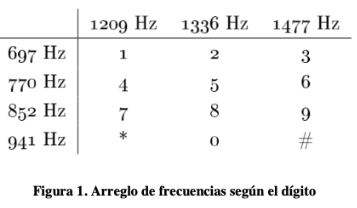

In [2]:
def DeterminarNumero(numero1, numero2):

    """Se eligió un intervalo de error de 10 digitos para las frecuencias"""

    if ((numero1<702)&(numero1>692)) & ((numero2<1214)&(numero2>1204)):
        return 1
    elif ((numero1<702)&(numero1>692)) & ((numero2<1341)&(numero2>1331)):
        return 2
    elif ((numero1<702)&(numero1>692)) & ((numero2<1482)&(numero2>1472)):
        return 3
    elif ((numero1<775)&(numero1>765)) & ((numero2<1214)&(numero2>1204)):
        return 4
    elif ((numero1<775)&(numero1>765)) & ((numero2<1341)&(numero2>1331)):
        return 5
    elif ((numero1<775)&(numero1>765)) & ((numero2<1482)&(numero2>1472)):
        return 6
    elif ((numero1<857)&(numero1>847)) & ((numero2<1214)&(numero2>1204)):
        return 7
    elif ((numero1<857)&(numero1>847)) & ((numero2<1341)&(numero2>1331)):
        return 8
    elif ((numero1<857)&(numero1>847)) & ((numero2<1482)&(numero2>1472)):
        return 9
    elif ((numero1<946)&(numero1>936)) & ((numero2<1214)&(numero2>1204)):
        return "*"
    elif ((numero1<946)&(numero1>936)) & ((numero2<1341)&(numero2>1331)):
        return 0
    elif ((numero1<946)&(numero1>936)) & ((numero2<1482)&(numero2>1472)):
        return "#"



def DatosyFourier(datos_segundos, amplitud):

    total= len(amplitud)
    tiempo = total / datos_segundos


    tiempo_x = np.linspace(0, tiempo, total)

    """ Aquí se aplica la transformada de Fourier"""


    f = abs(np.fft.fft(amplitud))
    freq = abs(np.fft.fftfreq(len(amplitud), d=tiempo_x[1]-tiempo_x[0]))
    indexes = find_peaks_cwt(f, np.arange(2, 10))
    freqBus= freq[indexes]
    frecuenciasFinales = freqBus[:2]

    Numero= DeterminarNumero(frecuenciasFinales[0],frecuenciasFinales[1])

    return Numero


def Graficar(datos_segundos,amplitud):

    total= len(amplitud)
    tiempo = total / datos_segundos


    tiempo_x = np.linspace(0, tiempo, total)

    """ Aquí se aplica la transformada de Fourier"""


    f = abs(np.fft.fft(amplitud))
    freq = abs(np.fft.fftfreq(len(amplitud), d=tiempo_x[1]-tiempo_x[0]))


    plt.plot(freq, f)
    plt.xlim(0, 2000)

    plt.show()

def GraficarWave(datos_segundos,amplitud):

    total= len(amplitud)
    tiempo = total / datos_segundos


    tiempo_x = np.linspace(0, tiempo, total)

    """ Aquí se aplica la transformada de Fourier"""


    plt.plot(tiempo_x,amplitud)

    plt.show()

In [3]:
"""El único dato que se debe editar es el de archivo"""

archivo = wavfile.read("Tono.wav")
datos_segundos = archivo[0]

"""Este es el archivo que contiene los datos"""
amplitud = np.array(archivo[1])

"""Esto se hizo, ya que el audio tiene 8 secciones """

amplitudPar= amplitud[:-1]
intervalos = np.split(amplitudPar,8)
numeroTelefonico= []

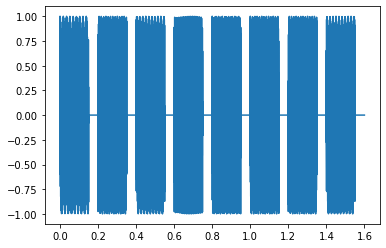

In [4]:
GraficarWave(datos_segundos,amplitudPar)

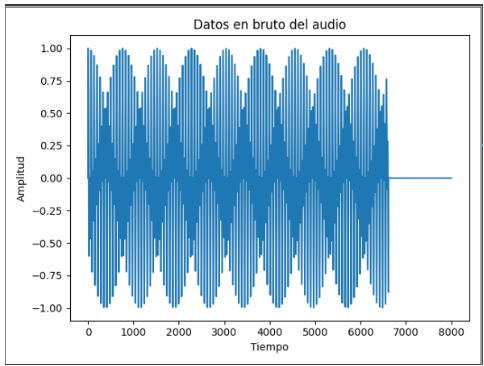

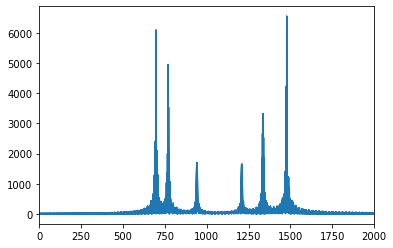

In [5]:
Graficar(datos_segundos,amplitudPar)

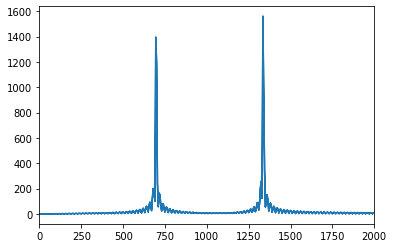

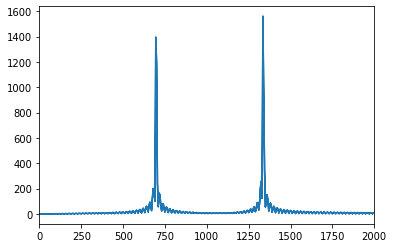

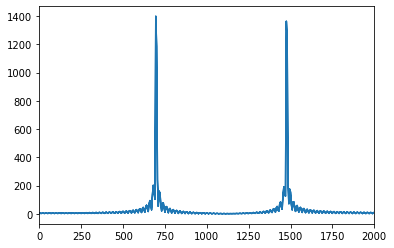

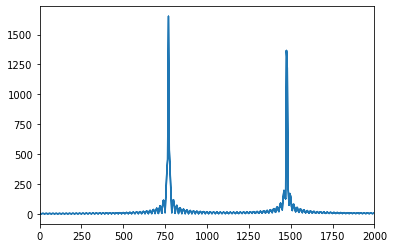

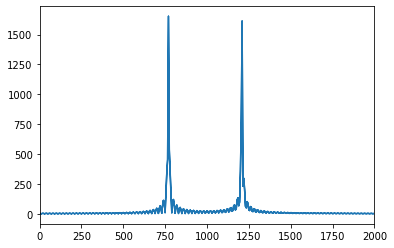

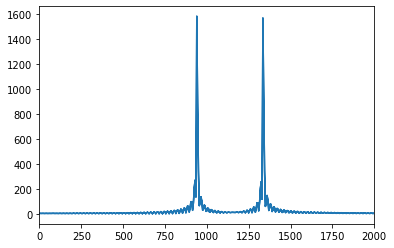

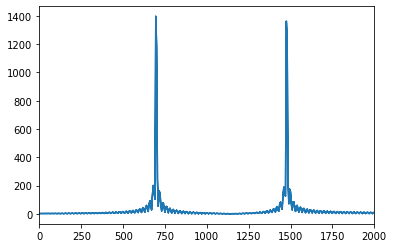

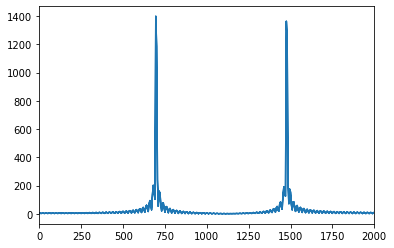

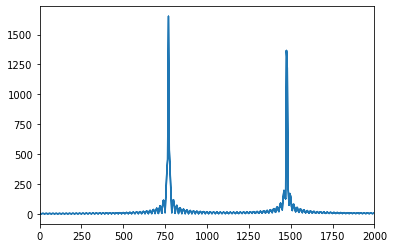

In [6]:
Graficar(datos_segundos,intervalos[0])

for i in range(0,8):
    intervalo1= intervalos[i]
    agregar = Graficar(datos_segundos,intervalo1)
    

In [7]:
for i in range(0,8):
    intervalo1= intervalos[i]

    agregar = DatosyFourier(datos_segundos,intervalo1)

    numeroTelefonico.append(agregar)


print(numeroTelefonico)

[2, 3, 6, 4, 0, 3, 3, 6]
